In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading both datasets
df1 = pd.read_csv('fraudTrain.csv', index_col=0)
df2 = pd.read_csv('fraudTest.csv', index_col=0)

In [3]:
# adding both datasets together with updated indexes
df = pd.concat([df1, df2], ignore_index=True)

In [4]:
df.drop('unix_time', axis=1, inplace=True) # dropping unix_time column as first column already has information on transaction timestamp

In [5]:
# sort the data by timestamp
df.sort_values('trans_date_trans_time', inplace=True)

In [16]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                       category
amt                             float64
first                            object
last                             object
gender                         category
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                           bool
dtype: object

In [7]:
# CHANGE COLUMNS TO CORRECT DATA TYPE
df['is_fraud'] = df['is_fraud'].astype('bool') # from int64 to bool

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']) # from object to datetime64[ns]
df['dob'] = pd.to_datetime(df['dob']) # from object to datetime64[ns]

df['gender'] = df['gender'].astype('category') # from object to category

df['category'] = df['category'].astype('category') # from object to category

In [17]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                       category
amt                             float64
first                            object
last                             object
gender                         category
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                           bool
dtype: object

In [9]:
# check for NULL values
sum(df.isnull().sum())

0

In [10]:
# check for NA values
sum(df.isna().sum())

0

In [14]:
# check for duplicated rows
df.duplicated().sum()

0

In [8]:
round(df['is_fraud'].sum() / df['is_fraud'].count() * 100, 4)

0.521

## Visualize Data

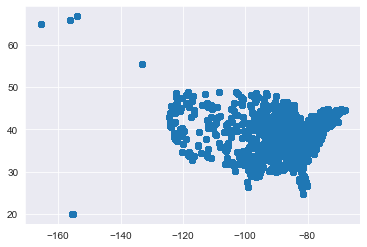

In [9]:
# visualize the GPS coordinates
plt.scatter(x=df.long, y=df.lat)
plt.show()

<AxesSubplot:xlabel='is_fraud', ylabel='amt'>

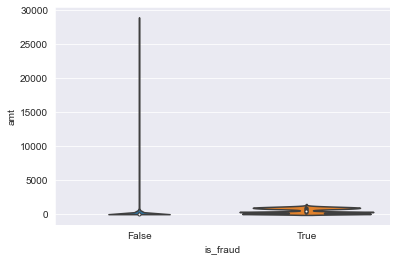

In [10]:
sns.violinplot(data=df, x='is_fraud', y='amt', split=True)

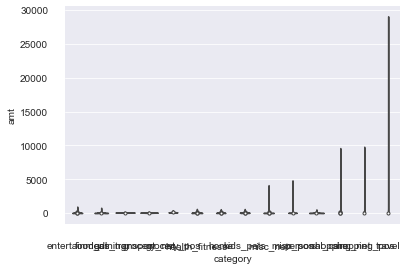

In [13]:
sns.violinplot(data=df, x='category', y='amt')
sns.despine(offset=10, trim=True)

<AxesSubplot:xlabel='state', ylabel='amt'>

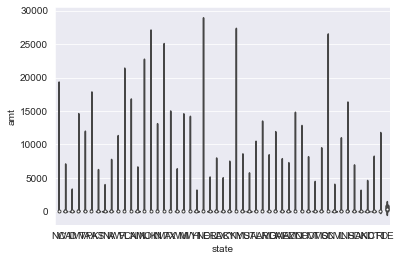

In [14]:
sns.violinplot(data=df, x='state', y='amt')

In [46]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,False
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,False
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,False
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,False
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,False


In [18]:
df.query('amt >= 5000').count() # number of transactions above 5k

trans_date_trans_time    195
cc_num                   195
merchant                 195
category                 195
amt                      195
first                    195
last                     195
gender                   195
street                   195
city                     195
state                    195
zip                      195
lat                      195
long                     195
city_pop                 195
job                      195
dob                      195
trans_num                195
merch_lat                195
merch_long               195
is_fraud                 195
dtype: int64

In [6]:
df.gender.describe()

count     1852394
unique          2
top             F
freq      1014749
Name: gender, dtype: object